In [56]:
import os
import math
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import special
import plotly.express as px
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [57]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [59]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [60]:
df.apply(lambda x: x.duplicated().sum())

Member_number      34867
Date               38037
itemDescription    38598
dtype: int64

In [61]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

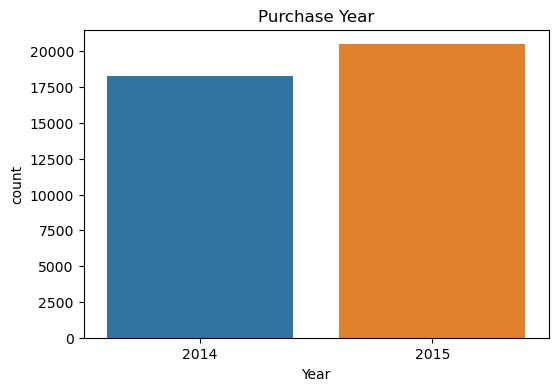

In [62]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Date'].dt.year, data=df)
plt.title('Purchase Year')
plt.xlabel('Year')
plt.show()

In [63]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [64]:
df1 = df.groupby(['year', 'month']).count().reset_index()
df1.head()

,year,month,Member_number,Date,itemDescription
0,2014,1,1527,1527,1527
1,2014,2,1437,1437,1437
2,2014,3,1411,1411,1411
3,2014,4,1561,1561,1561
4,2014,5,1615,1615,1615


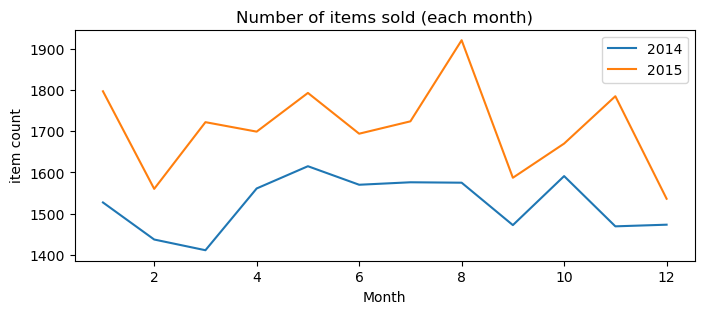

In [65]:
plt.figure(figsize=(8,3))
d_2014 = df1[df1['year'] == 2014]
d_2015 = df1[df1['year'] == 2015]
plt.plot(d_2014['month'],d_2014['itemDescription'],label='2014')
plt.plot(d_2015['month'],d_2015['itemDescription'],label='2015')
plt.title('Number of items sold (each month)')
plt.xlabel('Month')
plt.ylabel('item count')
plt.legend()
plt.show()

In [66]:
df1 = df.groupby(by='itemDescription').count().reset_index()
df1.drop(columns=['Date', 'month','year'], inplace=True)
df1.columns = ['Item', 'Sales']
df1 = df1.sort_values('Sales',ascending=False)

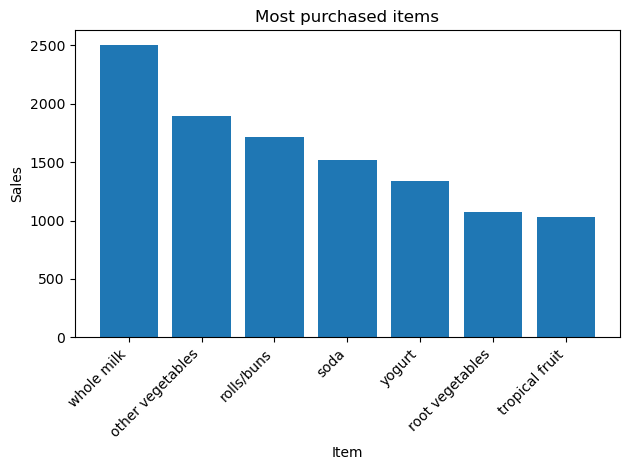

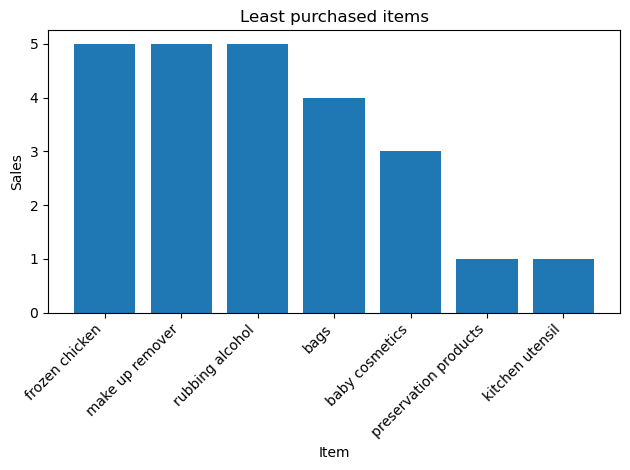

In [67]:
# Most purchased items
fig, ax = plt.subplots()
top_items = df1.head(7)
ax.bar(top_items['Item'], top_items['Sales'])
ax.set_title('Most purchased items')
ax.set_xlabel('Item')
ax.set_ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Least purchased items
fig, ax = plt.subplots()
bottom_items = df1.tail(7)
ax.bar(bottom_items['Item'], bottom_items['Sales'])
ax.set_title('Least purchased items')
ax.set_xlabel('Item')
ax.set_ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [68]:
df.drop(columns=['month','year'], inplace=True)
df[df['Member_number'] == 1000].sort_values(by='Date').head()

,Member_number,Date,itemDescription
13331,1000,2014-06-24,whole milk
29480,1000,2014-06-24,pastry
32851,1000,2014-06-24,salty snack
4843,1000,2015-03-15,sausage
8395,1000,2015-03-15,whole milk


In [69]:
df1 = df.copy()
df1['itemDescription'] = df1['itemDescription'].apply(lambda x: [x,]).copy()
df1 = df1.groupby(['Member_number','Date']).agg(sum).reset_index()
df1.rename(columns={'itemDescription': 'Items Bought'},inplace=True)
df1['Basket size'] = df1['Items Bought'].apply(lambda x: len(x))

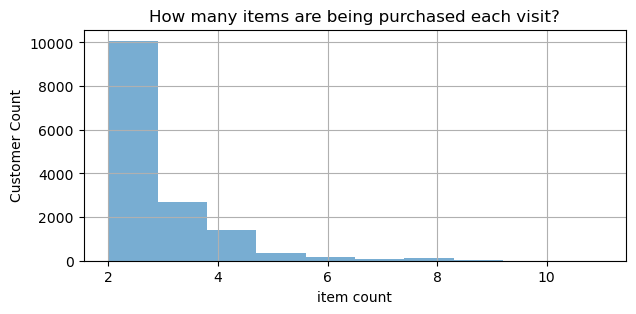

In [70]:
plt.figure(figsize=(7,3))
df1['Basket size'].hist(alpha=0.6)
plt.xlabel('item count')
plt.ylabel('Customer Count')
plt.title("How many items are being purchased each visit?")
plt.show()

In [71]:
df1 = df.copy()
df1['itemDescription'] = df1['itemDescription'].apply(lambda x: [x,]).copy()
df1 = df1.groupby(['Member_number','Date']).agg(sum).reset_index()
df1.rename(columns={'itemDescription': 'Items bought'},inplace=True)
all_items = df['itemDescription'].unique()
data = []
for transaction in df1['Items bought']:
    row = []
    for item in all_items:
        if item in transaction:
            row.append(1)
        else:
            row.append(0)
    data.append(row)
df2 = pd.DataFrame(data,columns=all_items)    
df2 = df2.rename_axis('Transcation ID')
frequent_itemsets = apriori(df2, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [72]:
df2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,butter,fruit/vegetable juice,packaged fruit/vegetables,chocolate,specialty bar,butter milk,bottled water,yogurt,sausage,brown bread,hamburger meat,root vegetables,pork,pastry,canned beer,berries,coffee,misc. beverages,ham,turkey,curd cheese,red/blush wine,frozen potato products,flour,sugar,frozen meals,herbs,soda,detergent,grapes,processed cheese,fish,sparkling wine,newspapers,curd,pasta,popcorn,finished products,beverages,bottled beer,dessert,dog food,specialty chocolate,condensed milk,cleaner,white wine,meat,ice cream,hard cheese,cream cheese,liquor,pickled vegetables,liquor (appetizer),UHT-milk,candy,onions,hair spray,photo/film,domestic eggs,margarine,shopping bags,salt,oil,whipped/sour cream,frozen vegetables,sliced cheese,dish cleaner,baking powder,specialty cheese,salty snack,Instant food products,pet care,white bread,female sanitary products,cling film/bags,soap,frozen chicken,house keeping products,spread cheese,decalcifier,frozen dessert,vinegar,nuts/prunes,potato products,frozen fish,hygiene articles,artif. sweetener,light bulbs,canned vegetables,chewing gum,canned fish,cookware,semi-finished bread,cat food,bathroom cleaner,prosecco,liver loaf,zwieback,canned fruit,frozen fruits,brandy,baby cosmetics,spices,napkins,waffles,sauces,rum,chocolate marshmallow,long life bakery product,bags,sweet spreads,soups,mustard,specialty fat,instant coffee,snack products,organic sausage,soft cheese,mayonnaise,dental care,roll products,kitchen towels,flower soil/fertilizer,cereals,meat spreads,dishes,male cosmetics,candles,whisky,tidbits,cooking chocolate,seasonal products,liqueur,abrasive cleaner,syrup,ketchup,cream,skin care,rubbing alcohol,nut snack,cocoa drinks,softener,organic products,cake bar,honey,jam,kitchen utensil,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
Transcation ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
frequent_itemsets = apriori(df2, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules = rules[rules['confidence'] > 0.1].copy()
rules.head()

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
717,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
710,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
722,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642,0.122281
124,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008,0.103985
705,"(rolls/buns, yogurt)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701,0.076751


In [75]:
rules.sort_values(by='lift',ascending=False).head(10).iloc[:,:-2][['antecedents', 'consequents', 'consequent support', 'lift']]

,antecedents,consequents,consequent support,lift
718,"(whole milk, yogurt)",(sausage),0.060349,2.182917
716,"(sausage, whole milk)",(yogurt),0.085879,1.911760
717,"(sausage, yogurt)",(whole milk),0.157923,1.619866
20,(flour),(tropical fruit),0.067767,1.617141
560,(processed cheese),(root vegetables),0.069572,1.513019
492,(soft cheese),(yogurt),0.085879,1.474952
470,(detergent),(yogurt),0.085879,1.444261
488,(chewing gum),(yogurt),0.085879,1.358508
710,"(rolls/buns, sausage)",(whole milk),0.157923,1.345594
248,(processed cheese),(rolls/buns),0.110005,1.315734


In [76]:
rules.sort_values(by='lift',ascending=True).head(10).iloc[:,:-2][['antecedents', 'consequents', 'consequent support', 'lift']]

,antecedents,consequents,consequent support,lift
109,(margarine),(whole milk),0.157923,0.801379
120,(hygiene articles),(whole milk),0.157923,0.803109
54,(rolls/buns),(whole milk),0.157923,0.804028
100,(hard cheese),(whole milk),0.157923,0.805917
99,(ice cream),(whole milk),0.157923,0.808960
76,(canned beer),(whole milk),0.157923,0.811821
56,(pot plants),(whole milk),0.157923,0.811821
67,(fruit/vegetable juice),(whole milk),0.157923,0.821072
69,(yogurt),(whole milk),0.157923,0.822940
113,(oil),(whole milk),0.157923,0.823471


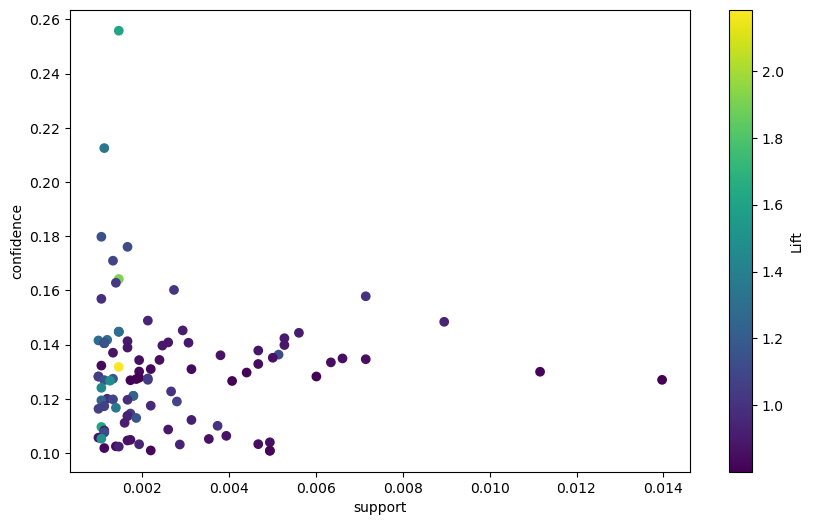

In [77]:
sup = rules['support'].values
conf = rules['confidence'].values
lift = rules['lift'].values
plt.figure(figsize=(10,6))
sc = plt.scatter(sup,conf,c=lift)
plt.colorbar(sc,label='Lift')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [78]:
rules[rules['confidence'] > 0.24]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
717,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.00147,0.255814,1.619866,0.000563,1.131541,0.384877


In [79]:
rules[rules['support'] > 0.01]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
69,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
54,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
